# Time Series Components

In [1]:
%load_ext autoreload
%autoreload 2

## Install `tfutils`

In [3]:
!pip install -e /content/drive/MyDrive/projects/tfutils

Obtaining file:///content/drive/MyDrive/projects/tfutils
  Running setup.py develop for tfutils


## Some imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Defining some useful functions

In [56]:
def plot_series(time, series):
    plt.figure(figsize=(12, 6))
    plt.plot(time, series)
    plt.xlabel('time')
    plt.ylabel('value')
    plt.grid(True)

In [9]:
def trend(time, slope=0):
    return slope*time

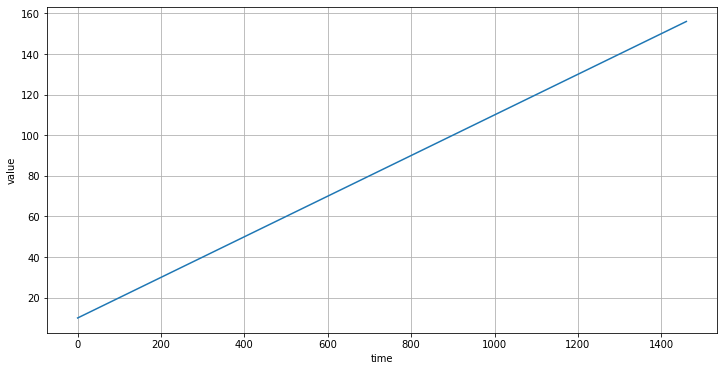

In [11]:
time = np.arange(4*365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)
plot_series(time, series)

In [16]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

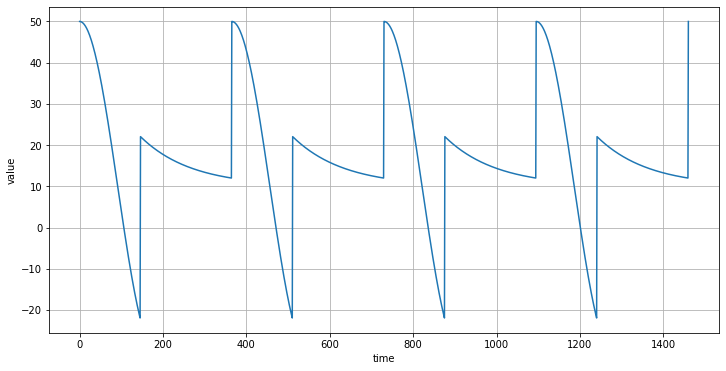

In [17]:
baseline = 10
amplitude = 40
series = baseline + seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

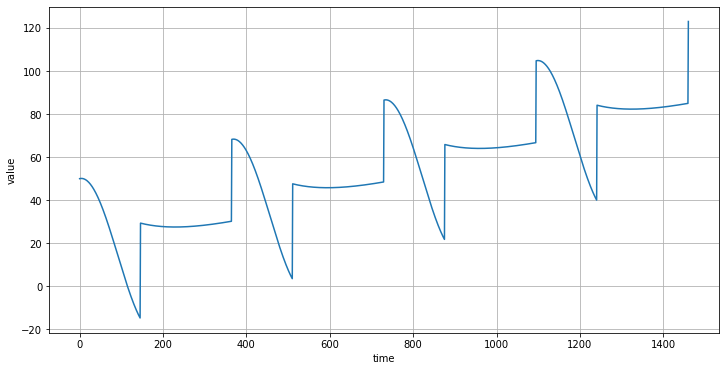

In [19]:
baseline = 10
amplitude = 40
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

In [20]:
def noise(time, noise_level=1):
    return np.random.normal(size=len(time), scale=noise_level)
     

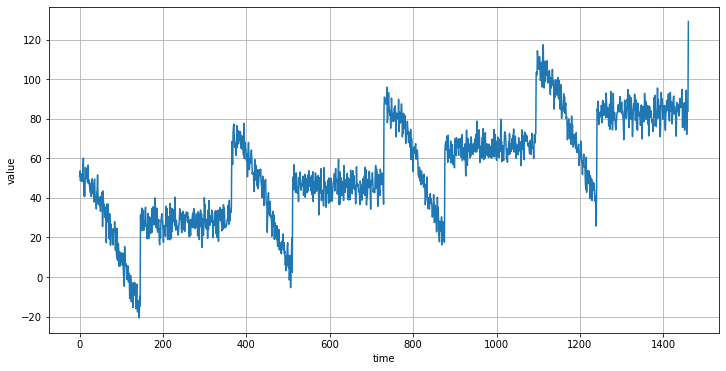

In [22]:
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude) + noise(time, noise_level)
plot_series(time, series)

In [35]:
def autocorrelation(time, amplitude, rhos, lags='auto'):

    if lags is 'auto':
        lags = list(reversed(range(1, len(rhos) + 1)))

    ar = np.random.randn(len(time) + 50)
    ar[:50] =  100
    for step in range(50, len(time) + 50):
        for i in range(len(rhos)):
            ar[step] += rhos[i]*ar[step - lags[i]]


    return ar[50:]*amplitude

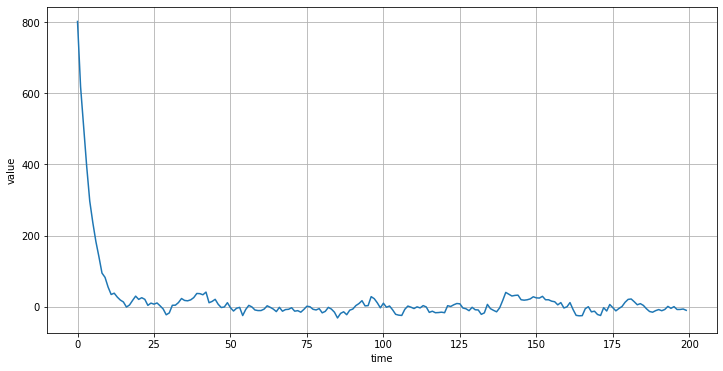

In [36]:
series = autocorrelation(time, 10, rhos=[0.8])
plot_series(time[:200], series[:200])

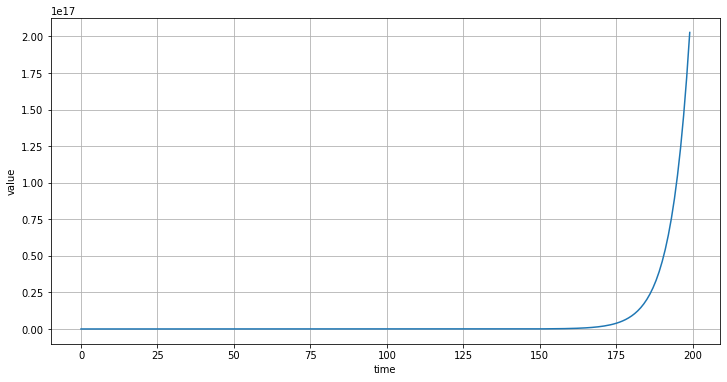

In [37]:
series = autocorrelation(time, 10, rhos=[0.8, 0.5])
plot_series(time[:200], series[:200])

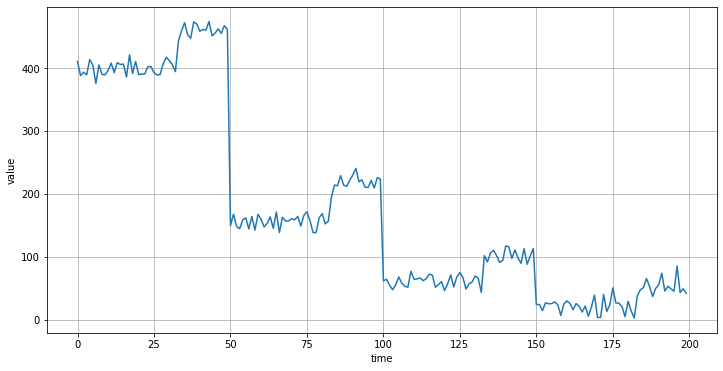

In [38]:
series = autocorrelation(time, 10, rhos=[-0.1, 0.5], lags=[33, 50])
plot_series(time[:200], series[:200])

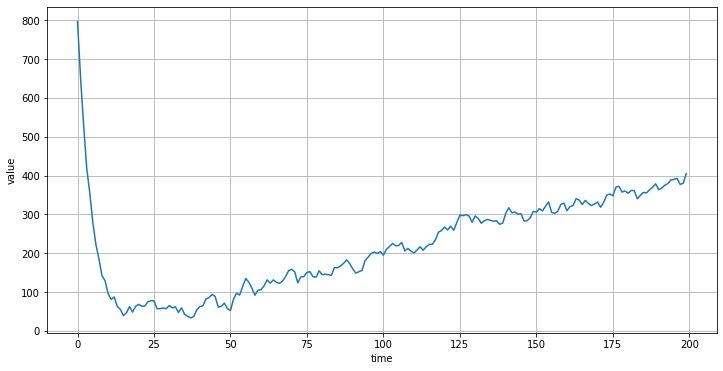

In [39]:
series = autocorrelation(time, 10, rhos=[0.8]) + trend(time, 2)
plot_series(time[:200], series[:200])

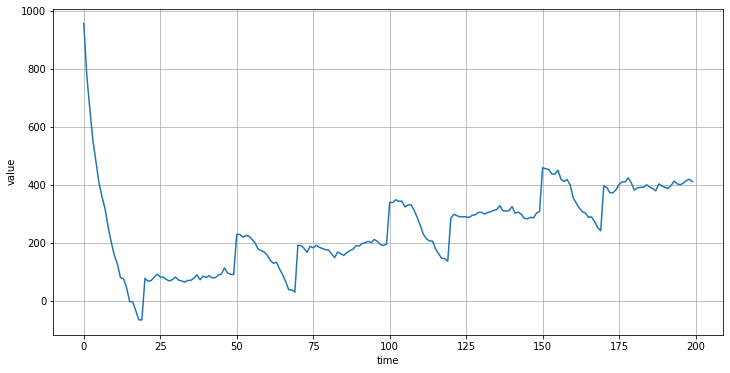

In [40]:
series = autocorrelation(time, 10, rhos=[0.8]) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])

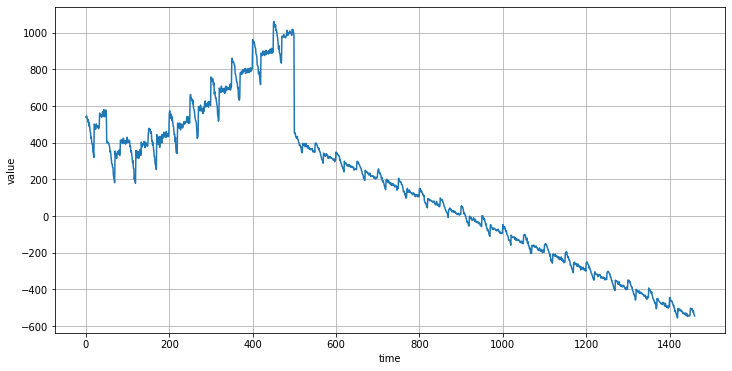

In [52]:
series = autocorrelation(time, 10, rhos=[-0.1, 0.5], lags=[33, 50]) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5,  rhos=[0.1]) + seasonality(time, period=50, amplitude=50) + trend(time, -1) + 900
series[500:] = series2[500:]
plot_series(time, series)

In [53]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size=num_impulses)
    series = np.zeros(len(time))
    for idx in impulse_indices:
        series[idx] = rnd.rand() * amplitude

    return series

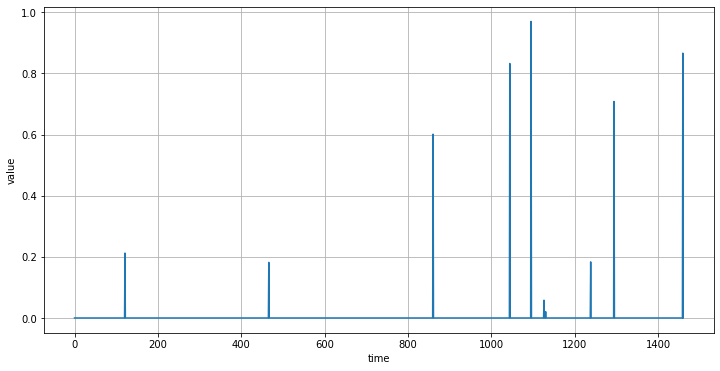

In [54]:
series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

In [61]:
def autocorrelation(source, phis):
    ar = source.copy()
    max_lag = len(phis)
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]
    return ar

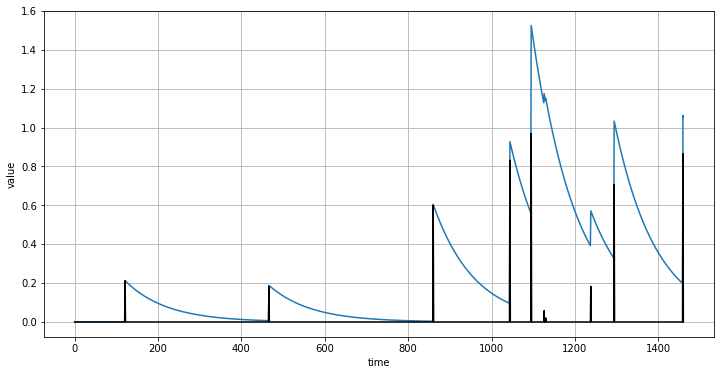

In [62]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

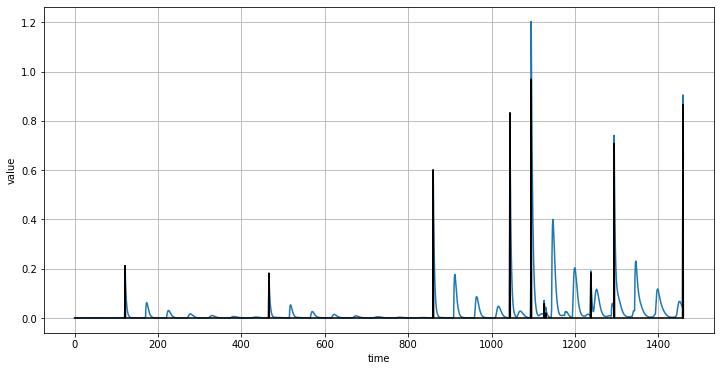

In [63]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1: 0.70, 50: 0.2})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

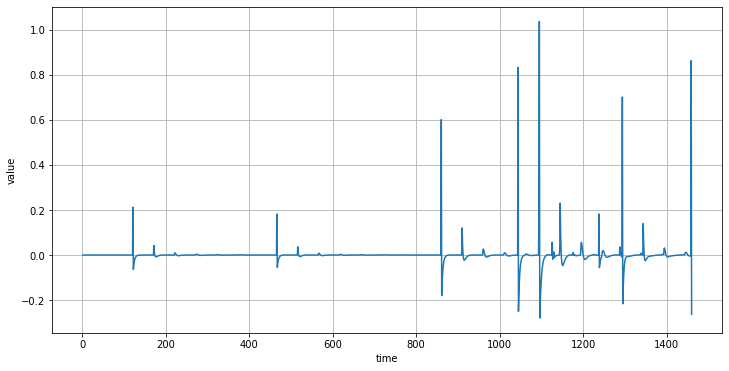

In [64]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

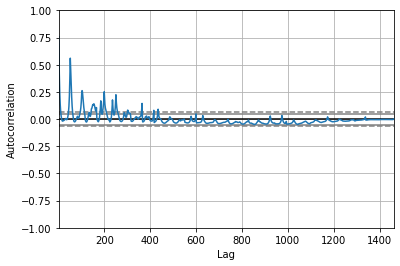

In [65]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

In [66]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Sun, 25 Jul 2021   AIC                          -4432.855
Time:                        07:41:02   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.715      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0

## Download Sunspots Data

In [69]:
import pandas as pd

In [67]:
!wget — no-check-certificate \
 https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
 -O /tmp/sunspots.csv

--2021-07-25 07:56:31--  http://xn--8ug/
Resolving xn--8ug (xn--8ug)... failed: Name or service not known.
wget: unable to resolve host address ‘xn--8ug’
--2021-07-25 07:56:31--  http://no-check-certificate/
Resolving no-check-certificate (no-check-certificate)... failed: Name or service not known.
wget: unable to resolve host address ‘no-check-certificate’
--2021-07-25 07:56:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 74.125.128.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [application/octet-stream]
Saving to: ‘/tmp/sunspots.csv’

/tmp/sunspots.csv   100%[===================>]  69.17K  --.-KB/s    in 0.001s  

2021-07-25 07:56:31 (118 MB/s) - ‘/tmp/sunspots.csv’ saved [70827/70827]

FINISHED --2021-07-25 07:56:31--
Total wall cl

In [72]:
df = pd.read_csv('/tmp/sunspots.csv', parse_dates=['Date'], index_col='Date').drop('Unnamed: 0', axis=1)
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


In [73]:
series = df['Monthly Mean Total Sunspot Number'].asfreq('1M')
series.head()

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
Freq: M, Name: Monthly Mean Total Sunspot Number, dtype: float64

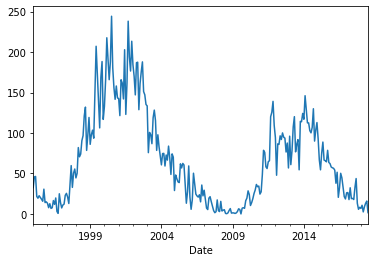

In [76]:
series['1995': ].plot()

(0.0, 100.0, -50.0, 50.0)

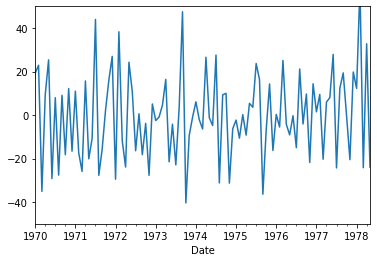

In [78]:
series.diff(1).plot()
plt.axis([0, 100, -50, 50])

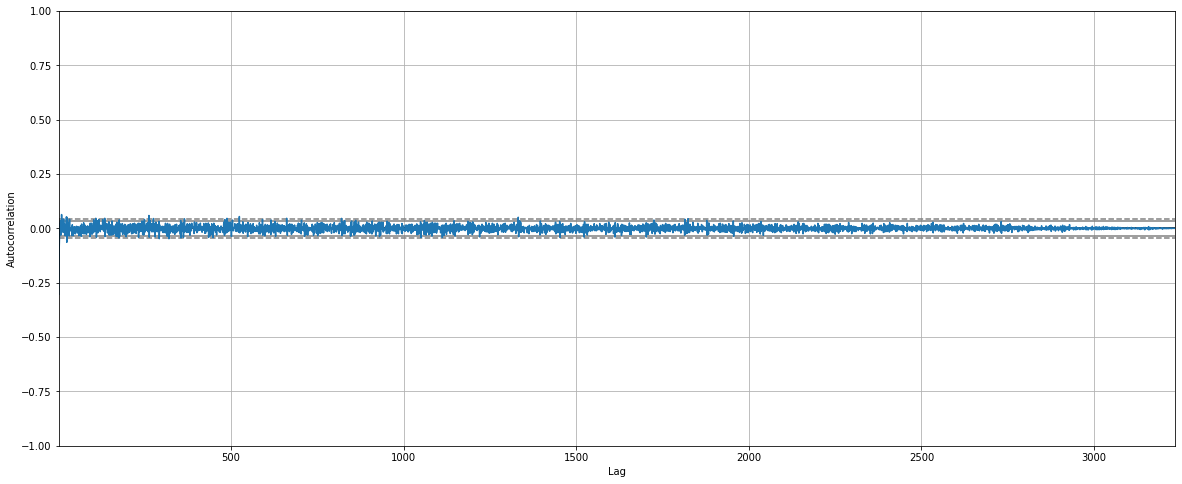

In [82]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(20, 8))
autocorrelation_plot(series.diff(1)[1:])

(0.0, 500.0, -0.1, 0.1)

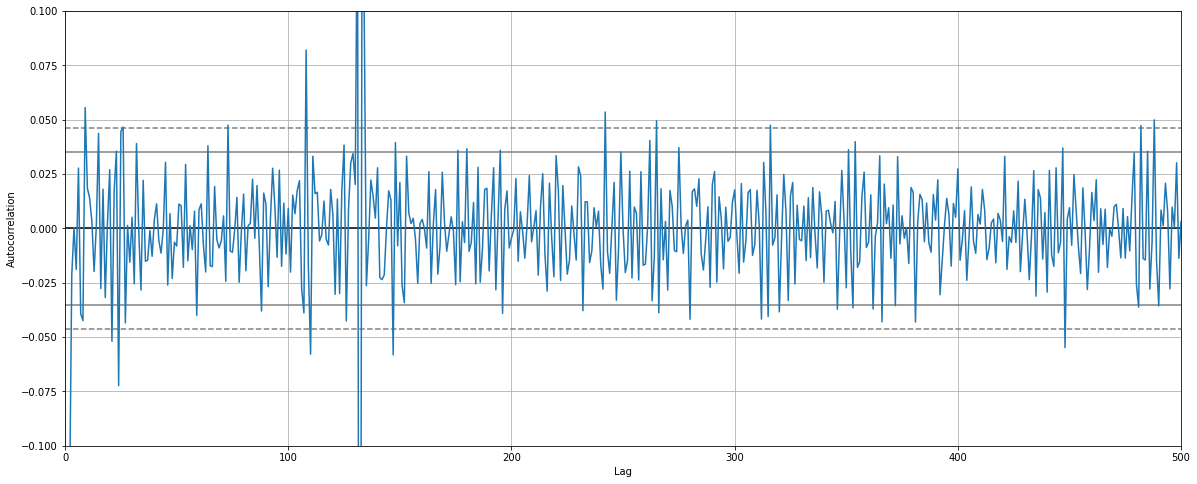

In [83]:
plt.figure(figsize=(20, 8))
autocorrelation_plot(series.diff(1)[1:].diff(11 * 12)[11*12+1:])
plt.axis([0, 500, -0.1, 0.1])

In [84]:
[series.autocorr(lag) for lag in range(1, 50)]

[0.9173241872367172,
 0.8847544206843756,
 0.8685991231372018,
 0.8579945644357172,
 0.8433856340533115,
 0.8306731729540909,
 0.8121138897370149,
 0.7986059878541064,
 0.7890399489112042,
 0.7689560950230405,
 0.747478871647231,
 0.7238791854325143,
 0.6980482665379878,
 0.6751408790165827,
 0.6495670049994807,
 0.6170092179855494,
 0.5872028494447984,
 0.5537209387574676,
 0.5254318210710768,
 0.49453915657274083,
 0.4609225001523781,
 0.4325062022560218,
 0.4054329883610247,
 0.3695928959353225,
 0.34435498994607716,
 0.31069676226343457,
 0.2711411693399099,
 0.2364696401494822,
 0.20297806535027274,
 0.17379537689762684,
 0.1401079383689796,
 0.1122744517746069,
 0.07751076852866035,
 0.04405495796060674,
 0.012510863120931906,
 -0.017282156504566288,
 -0.046433352357512205,
 -0.07440203532677167,
 -0.10339501296715739,
 -0.12680806162977243,
 -0.15309282641975924,
 -0.17906178224521463,
 -0.20506772757843433,
 -0.22530867957591927,
 -0.24665870005795568,
 -0.2690460785496861,
 -0

(0.0, 500.0, -0.1, 0.1)

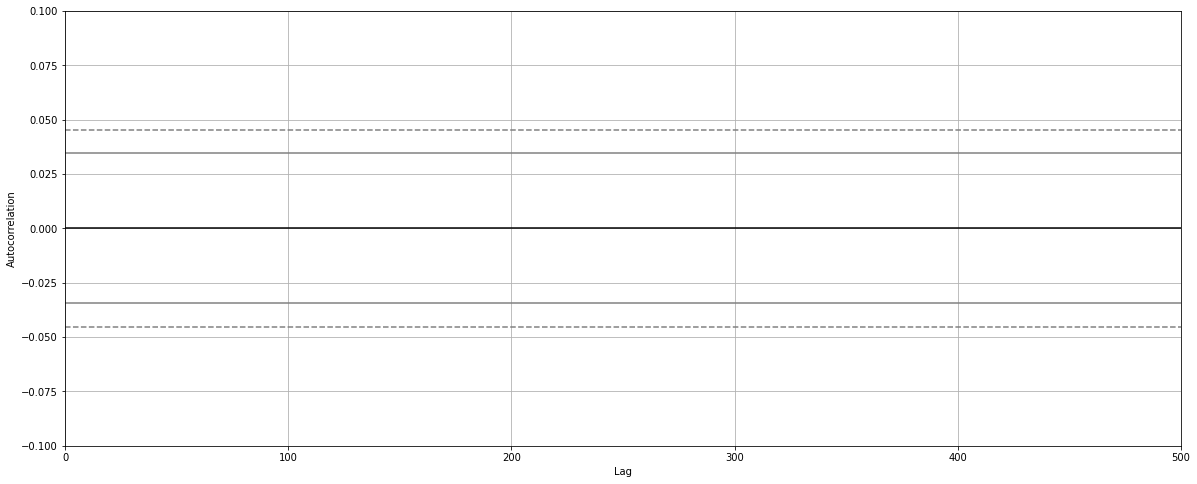

In [88]:
series_diff = series

for lag in range(50):
    series_diff = series_diff[1:] - series_diff[:-1]


plt.figure(figsize=(20, 8))
autocorrelation_plot(series_diff)
plt.axis([0, 500, -0.1, 0.1])

In [93]:
series_diff1

Date
1749-02-28    0.0
1749-03-31    0.0
1749-04-30    0.0
1749-05-31    0.0
1749-06-30    0.0
             ... 
2018-02-28    0.0
2018-03-31    0.0
2018-04-30    0.0
2018-05-31    0.0
2018-06-30    0.0
Freq: M, Name: Monthly Mean Total Sunspot Number, Length: 3233, dtype: float64

In [97]:
series[1:]

Date
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
1749-06-30    139.2
              ...  
2018-03-31      2.5
2018-04-30      8.9
2018-05-31     13.2
2018-06-30     15.9
2018-07-31      1.6
Freq: M, Name: Monthly Mean Total Sunspot Number, Length: 3234, dtype: float64

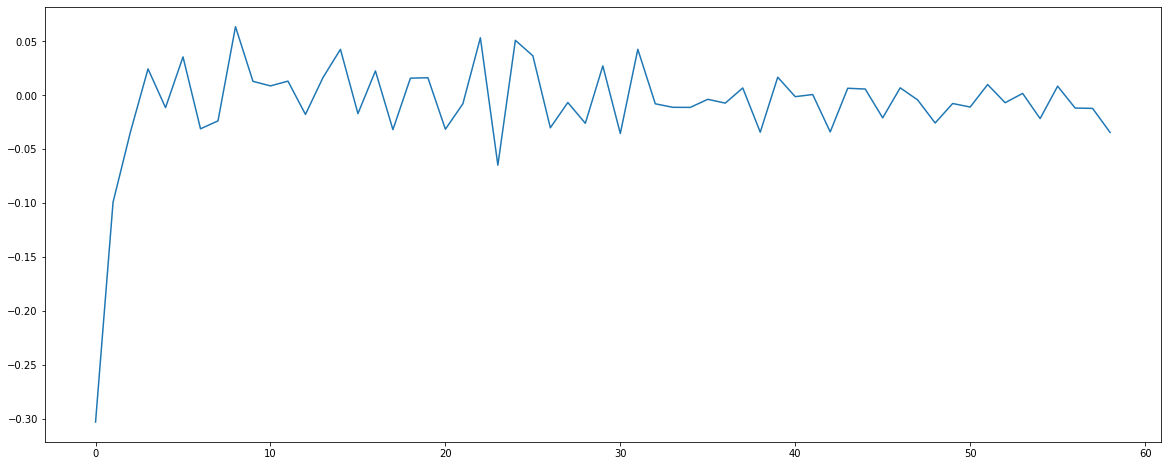

In [100]:
plt.figure(figsize=(20, 8))

series_diff1 = pd.Series(series.diff(1))
autocorrs = [series_diff1.autocorr(lag) for lag in range(1, 60)]
plt.ylim(-0.5, 0.5);
